# sythdid: Synthetic Difference in Difference Estimation

This package implements the synthetic difference-in-differences estimation procedure, along with a range of inference and graphing procedures, following the work of the author. The package draws on [R](https://github.com/synth-inference/synthdid) and [Julia](https://github.com/d2cml-ai/Synthdid.jl) code for optimization and [Stata](https://github.com/Daniel-Pailanir/sdid) code for implementation in contexts with staggered adoption over multiple treatment periods (as well as in a single adoption period as in the original code). The package extends the functionality of the original code, allowing for estimation in a wider range of contexts. Overall, this package provides a comprehensive toolkit for researchers interested in using the synthetic difference-in-differences estimator in their work.



## Instalation

```py
pip install synthdid
```

## Usage

### Class input `Synthdid`

- `outcome`: Outcome variable (numeric)
- `unit`: Unit variable (numeric or string)
- `time`: Time variable (numeric)
- `quota`: Dummy of treatement, equal to 1 if units are treated, and otherwise 0 (numeric)

### Methods:

- `.fit(cov_method = ["optimized", "projected"])`
- `.vcov(method = ["placebo", "bootstrap", "jackknife"], n_reps:int = 50)`

## Example

### California 

In [1]:
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

from synthdid.synthdid import Synthdid as sdid
from synthdid.get_data import quota, california_prop99
pd.options.display.float_format = '{:.4f}'.format

Estimations with Standard Variance-Covariance Estimation

In [2]:
california_estimate = sdid(california_prop99(), unit="State", time="Year", treatment="treated", outcome="PacksPerCapita").fit().vcov(method='placebo')
california_estimate.summary().summary2

,ATT,Std. Err.,t,P>|t|
0,-15.6038,9.5733,-1.6299,0.1031


Estimations without Standard Variance-Covariance Estimation

In [3]:
california_estimate = sdid(california_prop99(), "State", "Year", "treated", "PacksPerCapita").fit()
california_estimate.summary().summary2

,ATT,Std. Err.,t,P>|t|
0,-15.6038,-,-,-


#### Plots

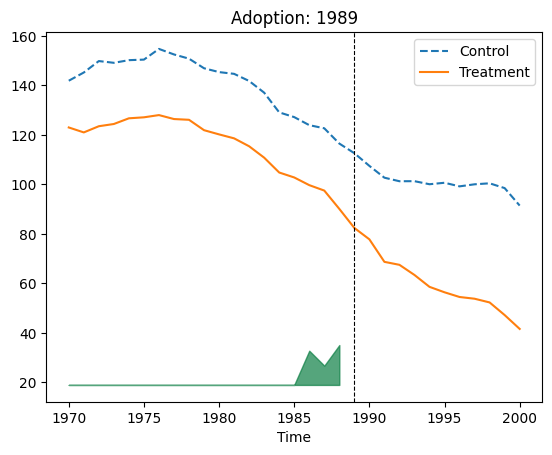

In [4]:
california_estimate.plot_outcomes();

d:\work\synthdid.py\synthdid\plots.py:136: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(units, rotation = 90, fontsize = ns);


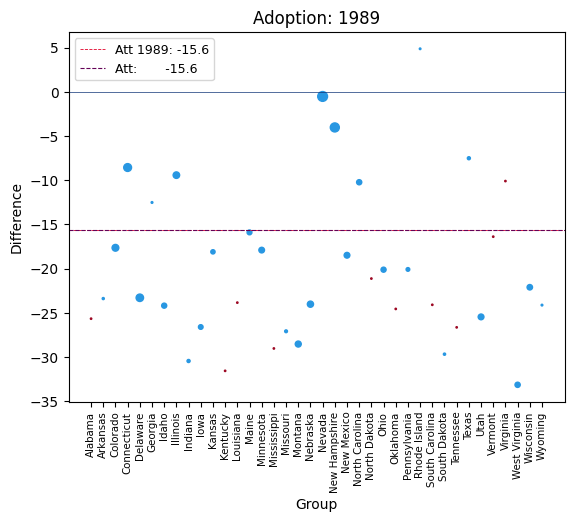

In [5]:
california_estimate.plot_weights()

## Quota

In [6]:
quota_estimate = sdid(quota(), "country", "year", "quota", "womparl").fit()


In [7]:
quota_estimate.vcov().summary().summary2 ## placebo 

,ATT,Std. Err.,t,P>|t|
0,8.0341,1.9112,4.2037,0.0000


#### With covariates

In [8]:

quota_cov = quota().dropna(subset="lngdp")
quota_cov_est = sdid(quota_cov, "country", 'year', 'quota', 'womparl', covariates=['lngdp']).fit()
quota_cov_est.summary().summary2

,ATT,Std. Err.,t,P>|t|
0,8.0490,-,-,-


Covariable method = 'projected'

In [9]:
quota_cov_est.fit(cov_method="projected").summary().summary2

,ATT,Std. Err.,t,P>|t|
0,8.0590,-,-,-


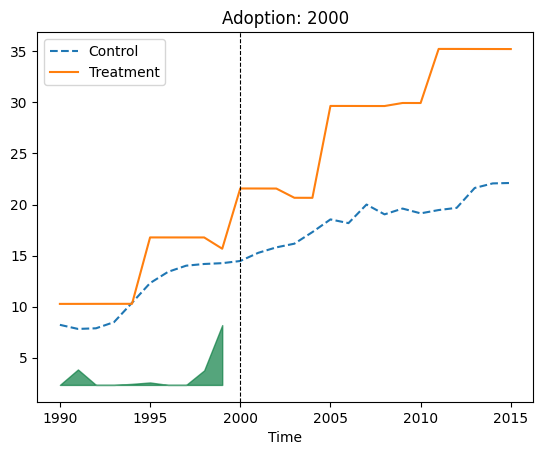

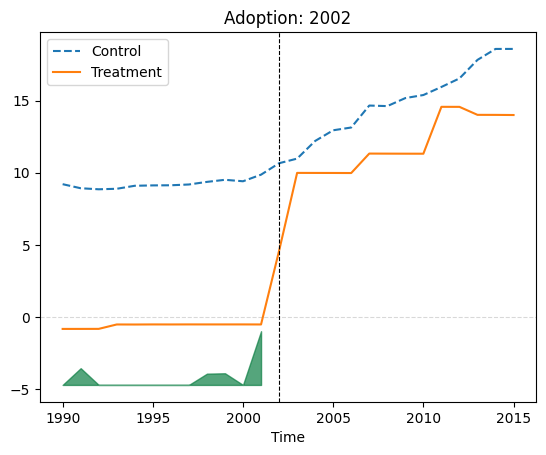

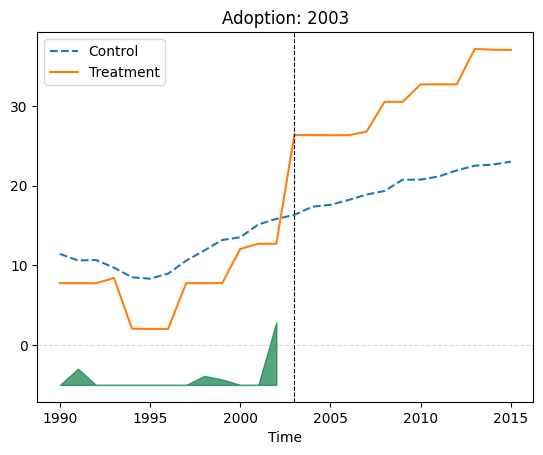

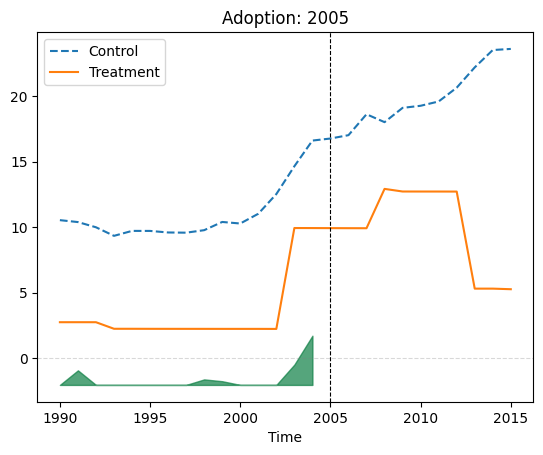

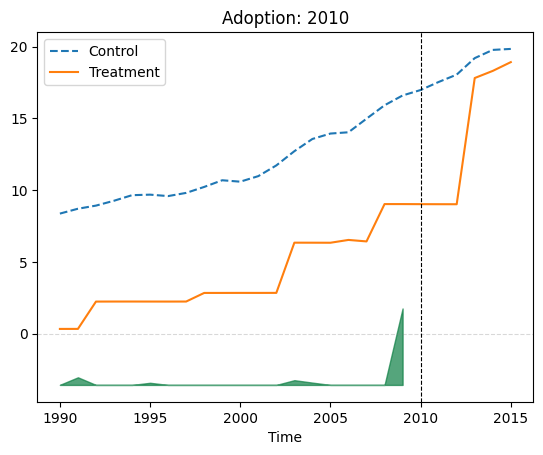

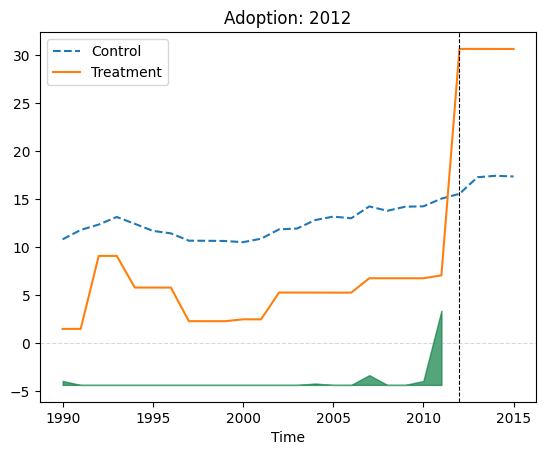

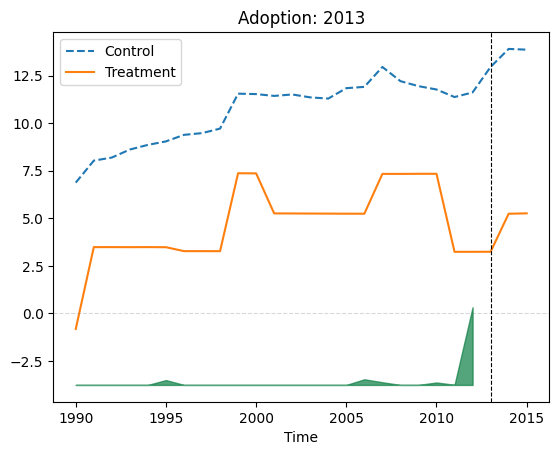

In [10]:
quota_cov_est.plot_outcomes()

d:\work\synthdid.py\synthdid\plots.py:136: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(units, rotation = 90, fontsize = ns);
d:\work\synthdid.py\synthdid\plots.py:136: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(units, rotation = 90, fontsize = ns);
d:\work\synthdid.py\synthdid\plots.py:136: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(units, rotation = 90, fontsize = ns);
d:\work\synthdid.py\synthdid\plots.py:136: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(units, rotation = 90, fontsize = ns);
d:\work\synthdid.py\synthdid\plots.py:136: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(units, rotation = 90, fontsize = ns);
d:\work\synthdid.py\synthdid\plots.py:136: UserWarning: FixedFormatter should only be used together with FixedLocat

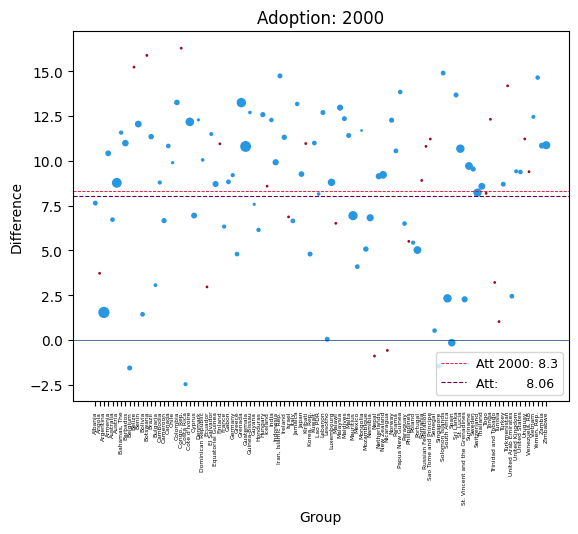

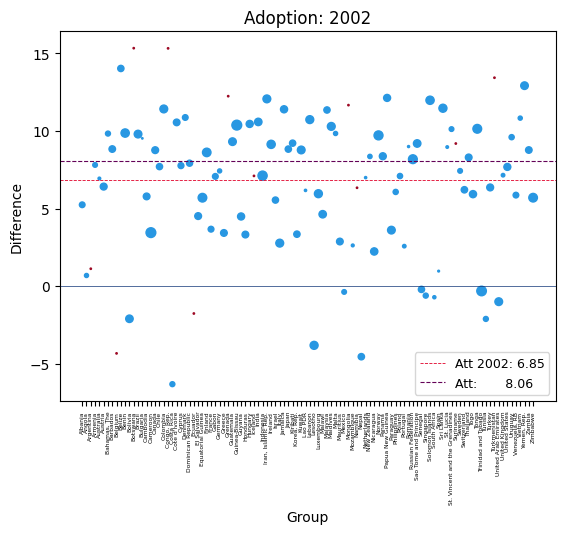

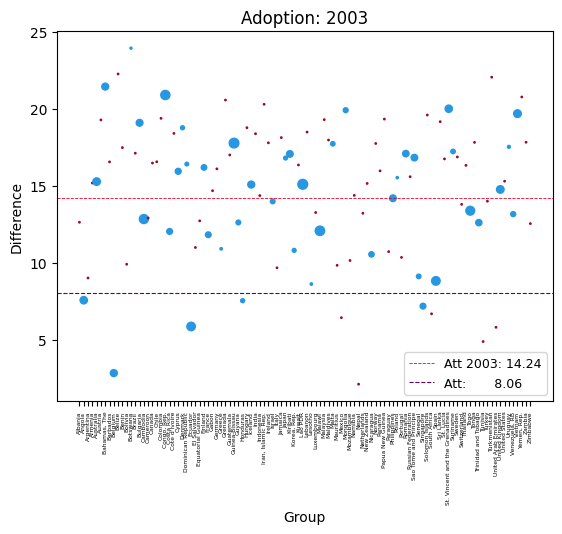

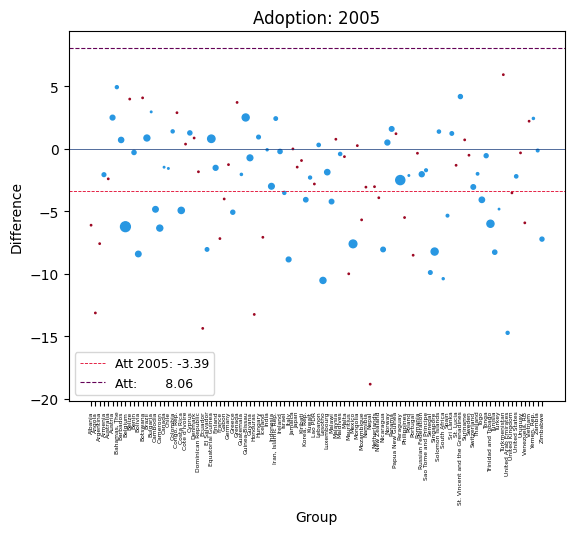

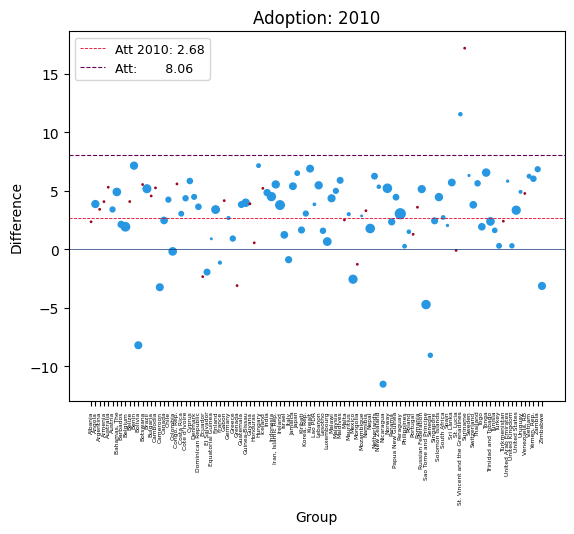

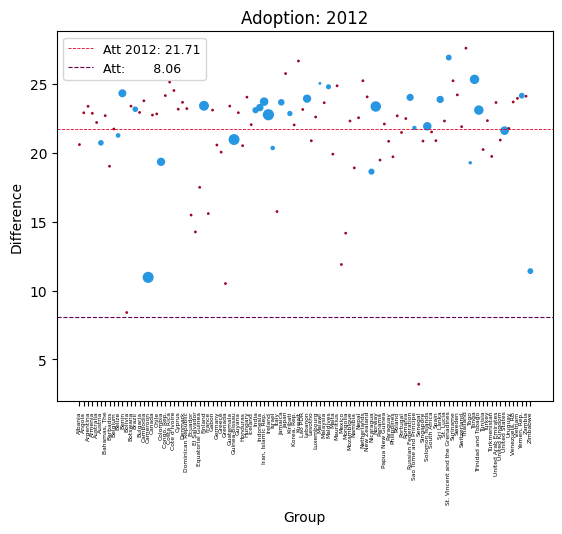

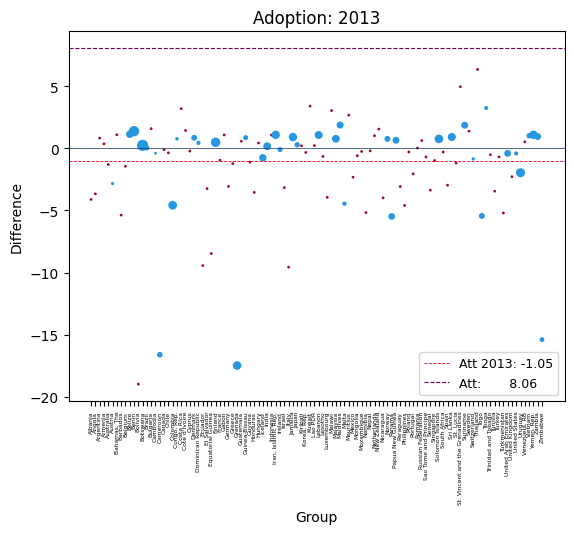

In [11]:
quota_cov_est.plot_weights()